In [ ]:
## TwoAmbulanceChimeraEmbedding

This notebook aids the process of converting an adjacency table into a fully embedded problem in the Chimera topology.

In [ ]:
# key functions
#is a given edge in a union(structured_sampler,  list)
def is_edge_in_structure(structured_sampler,edge_test):
    return is_in
# for display 
def get_chains_from_embedding( structured_sampler,list(c16.edges), embedding)
    return chain_edges, chain_hole_list
#find what is in graph but not in structured_sampler
def sampler_node_not_in_chimera_graph(structured_sampler,first_cross_up_down=0, last_cross_up_down=16,first_cross_left_right=0,last_cross_left_right=16):
    return qpu_focus, holes_in_focus, nodes_not_in_sampler

def is_edge_in_node_limits

def get_target_edges_from_logical( structured_sampler, embedding, Adjacency_logical):
    return edge_target_list,node_target_list


In [117]:
#TWO AMBULANCE DISTANCE MINIMISATION - 

import numpy as np 
#RC utility functions    
from pyaqc.RCModules.PlatformConversion import print_QUBOdetails, CreateTwoAmbulanceAdjacencyV1,CreateTwoAmbulanceAdjacencyV2
#################################### Create Adjacency defined as a qubo ####################################
n_destinations = 3*2
gridWidth = 3# n_destinations
Width  = gridWidth
Height = n_destinations//gridWidth

result = CreateTwoAmbulanceAdjacencyV2(gridWidth,n_destinations, Adddistance = 1, ConstraintMultiplier=5, use_XYMixer_constraints=0)

Adjacency = result['qubo']
AdjacencyHybrid = result['quboHybrid']
n_qubits = result['n_qubits']
ConstraintMultiplier = result['ConstraintMultiplier']
max_distance = result['max_distance']

print(ConstraintMultiplier/max_distance ,' = ConstraintMultiplier/max_distance')
if 1:
    filename = 'Twoambulances.txt'
    
    print_QUBOdetails(Adjacency,n_qubits,filename)

1.0  = ConstraintMultiplier/max_distance
ADJACENCY MATRIX Twoambulances.txt  

Qubit  q0   q1   q2   q3   q4   q5   q6   q7   q8   q9  q10  q11  q12  q13  q14  q15  q16  q17  q18  q19  q20  q21  q22  q23 

  q0   -5                            10                                 1    4    1    2    5  

  q1        -5                            10                       1         1    2    1    2  

  q2             -5                            10                  4    1         5    2    1  

  q3                  -5                            10             1    2    5         1    4  

  q4                       -5                            10        2    1    2    1         1  

  q5                            -5                            10   5    2    1    4    1  

  q6                                 -5                                                               1    4    1    2    5  

  q7                                      -5                                              

In [118]:
def is_edge_in_structure(structured_sampler,edge_test):
    """
    params
        'edge_test' (type: (q1,q2)) 
        structured_sampler (type: union(list[tuple], dwave.system.dwave_sampler)
    
    return (type:bool) True  if edge, or reversed(edge), is present in both 
        a) 'edges_test'  and 
        b) the structured_sampler
    """
    
    try:
        if type(structured_sampler) is not list:
            structured_sampler = list(structured_sampler.edgelist)
        idx = structured_sampler.index(edge_test)
        is_in = True
    except ValueError as err:
        try:
            idx = structured_sampler.index(tuple(reversed(edge_test))  )
            is_in = True
        except ValueError as err:
            is_in = False
    return  is_in     

def is_node_in_structure(structured_sampler,node):
    is_in = True
    if type(structured_sampler) is not list:
            structured_sampler = list(structured_sampler.nodelist)
    try:
        idx = structured_sampler.index(node)        
    except ValueError as err:
        is_in = False
    return is_in
def is_edge_in_node_limits(edge,first_cross_up_down=0, last_cross_up_down=16,first_cross_left_right=0,last_cross_left_right=16):
    edge_0_in_limits = False
    edge_1_in_limits = False
    for row in range(first_cross_up_down, last_cross_up_down):
            start_node_v    = first_cross_left_right * 8 + row * 128
            end_node_v      = last_cross_left_right * 8 + row * 128

            if edge[0] >= start_node_v  and edge[0] < end_node_v:
                edge_0_in_limits = True
            if edge[1] >= start_node_v  and edge[0] < end_node_v:
                edge_1_in_limits = True
    return edge_0_in_limits and edge_1_in_limits


def sampler_node_not_in_chimera_graph(structured_sampler,first_cross_up_down=0, last_cross_up_down=16,first_cross_left_right=0,last_cross_left_right=16):
    """
    Returns 
        qpu_focus               (type:list)   edges in the graph topology and in the selected range of the graph
        holes_in_focus          (type:list)   edges, from qpu_focus, that are not in the qpu /sampler
        nodes_not_in_sampler    (type:list)   nodes  , from qpu_focus, are not in the qpu / sampler
    """
    qpu_focus = []              # nodes and edges in the graph topology and in the selected range of the graph
    holes_in_focus = []         # edges above that are not in the qpu /sampler
    nodes_not_in_sampler = []    # nodes above that are not in the qpu / sampler

    c16 = dnx.chimera_graph(16,16)
    graph_topology = c16

    for edge in graph_topology.edges:
            # iterate through every edge in the graph_topology
        
        # Is edge withing focus limits?
        if is_edge_in_node_limits(edge,first_cross_up_down, last_cross_up_down,first_cross_left_right,last_cross_left_right):
                # Is edge, or reversed(edge), in structured_sampler 
                if is_edge_in_structure(structured_sampler,edge):
                    qpu_focus.append(edge)
                else:   
                    #Add missing edge to list
                    holes_in_focus.append(edge)             
                    # Is missing edge due to a missing node?
                    if not is_node_in_structure(structured_sampler,edge[0]):
                        if not is_node_in_structure(nodes_not_in_sampler,edge[0]):
                            nodes_not_in_sampler.append(edge[0])
                
                    if not is_node_in_structure(structured_sampler,edge[1]):
                        if not is_node_in_structure(nodes_not_in_sampler,edge[1]):
                            nodes_not_in_sampler.append(edge[1])
                
    return qpu_focus, holes_in_focus, nodes_not_in_sampler

696 24 4  = nodes_not_in_sampler


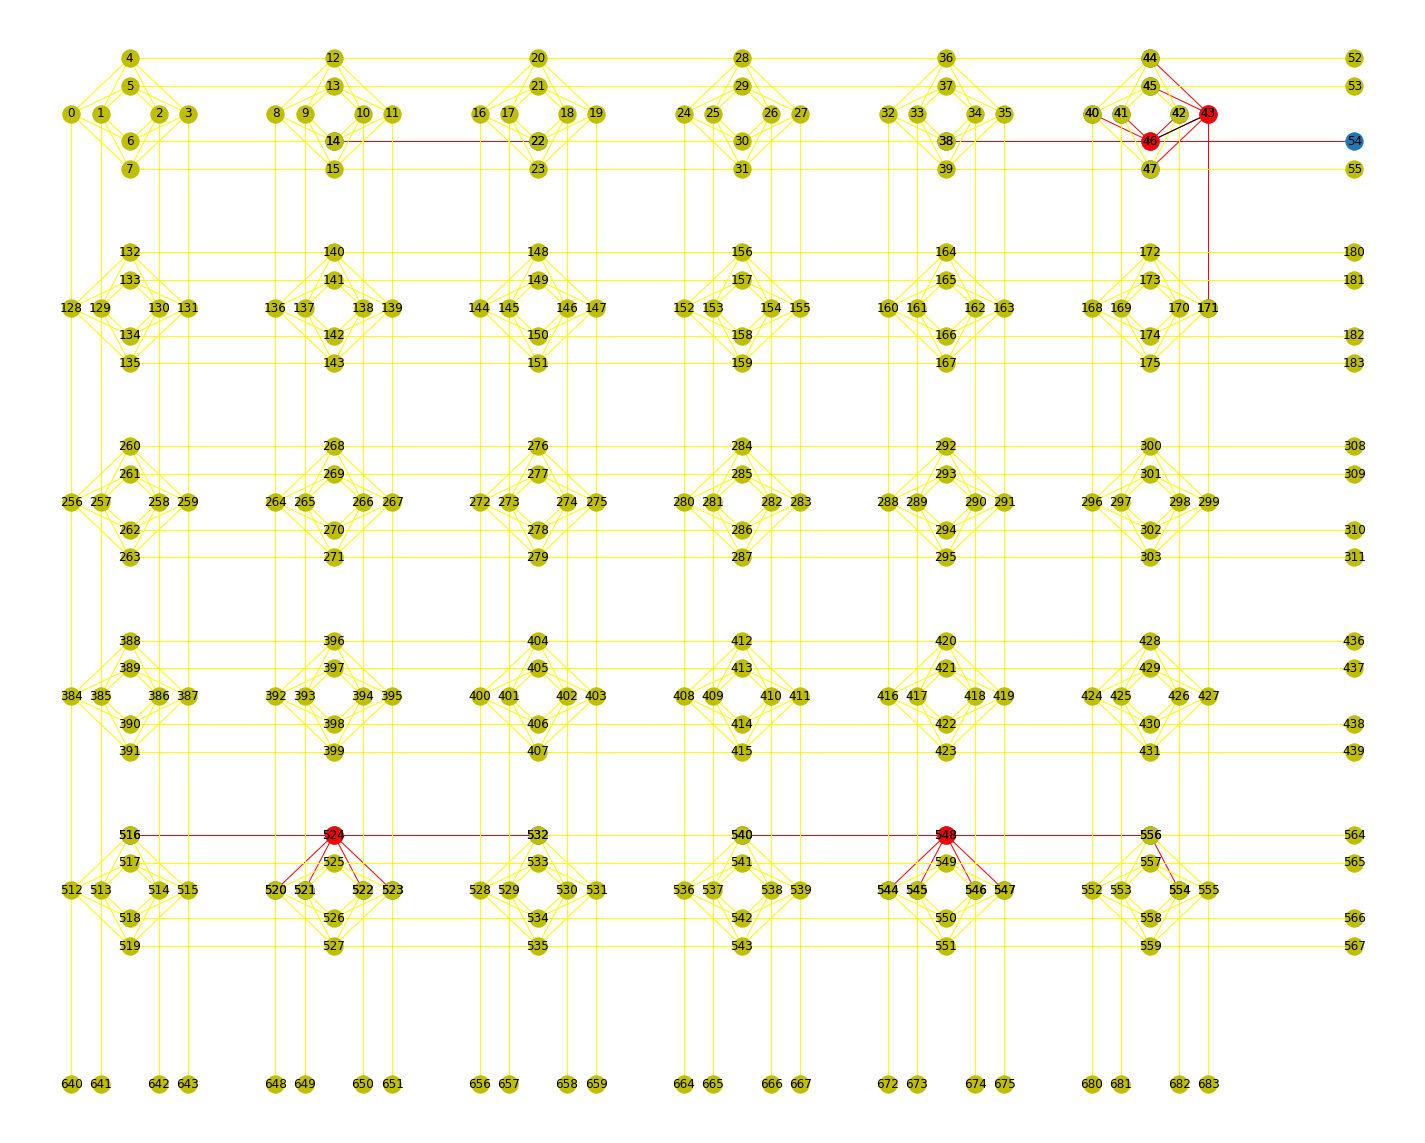

In [274]:
# Show DIFFERENCE Chimera topology, and DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})

# chimera has a different numbering of nodes convention, cross by cross not column by column AS IN 
#c16= dnx.chimera_graph(16,16,node_list=[node for node in range(0,30)])


from dwave.system.samplers import DWaveSampler
import dwave_networkx as dnx
import matplotlib.pyplot as plt
structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})#, chains=[2,3])                      

# set number of cross to display left rightand up and down to select the area of focus

first_cross_left_right = 0     # each cross has 4 sequentially labelled nodes
last_cross_left_right = 6

first_cross_up_down = 0
last_cross_up_down = 5                       
qpu_focus, holes_in_focus, nodes_not_in_sampler  = sampler_node_not_in_chimera_graph(structured_sampler,first_cross_up_down, last_cross_up_down,first_cross_left_right,last_cross_left_right)
print(len(qpu_focus), len(holes_in_focus), len(nodes_not_in_sampler), ' = nodes_not_in_sampler'        )
draw = 1
if draw:
    qpu_graph = dnx.chimera_graph(16,16,edge_list=qpu_focus)
    holes_graph = dnx.chimera_graph(16,16,edge_list=holes_in_focus)
    missing_nodes_graph = dnx.chimera_graph(16,16,node_list=nodes_not_in_sampler)
    plt.ion()
    fig, ax = plt.subplots()
    ax. set_frame_on(False)
    ax. tick_params(axis='both',labelcolor='w')
    ax. tick_params(axis='both',which='both',color='white')
    fig.set_figwidth(20.0)
    fig.set_figheight(16.0)
    dnx.draw_chimera(holes_graph, with_labels=True,  edge_color="r")
    dnx.draw_chimera(qpu_graph, with_labels=True,  edge_color="Yellow", node_color='y')

    dnx.draw_chimera(missing_nodes_graph, with_labels=True,  node_color="r")

In [164]:
DWave_chimera_embedding1 ={0: (1765, 1762, 1773), 6: (1895, 1890), 13: (1635, 1644, 1636, 1763), 14: (1768, 1775, 1640), 15: (1758, 1626, 1766, 1774, 1754), 16: (1756, 1764, 1772, 1752, 1624), 17: (1629, 1645, 1637, 1634), 19: (2019, 1891, 2021, 2029), 20: (1909, 1901, 1905, 2033, 1893), 21: (1892, 1900, 1908, 1904, 2032), 22: (1896, 2024, 1902, 1894), 23: (2028, 2020, 2036, 2018), 2: (1633, 1761), 3: (1642, 1770), 4: (1643, 1771), 5: (1760, 1632, 1767), 12: (1630, 1646, 1638), 1: (1769, 1641), 7: (1897, 2025), 18: (2031, 2039, 2023), 8: (1889, 2017), 9: (1898, 2026), 10: (1899, 2027), 11: (1888, 2016)} 
offset_embedding = {}
#move embedding up 12 crosses and left 8 crosses
offset = 12*128 + 8 * 8
for key, chain in DWave_chimera_embedding1.items():
    newchain = []
    for  val in chain:
        newchain.append(val - offset)
        if val - offset <0: print('err')
    offset_embedding[key] = tuple(newchain)
    
embedding_RC =  {12: [997, 4309, 4310], 13: [1012, 4294, 4295], 14: [1027, 4250], 15: [1042, 4235], 16: [1057], 17: [1072], 0: [4325], 1: [4340], 2: [4355], 3: [4370], 4: [4385], 5: [4400], 18: [1177, 4416], 19: [1192, 4431], 20: [1207, 4251, 1208], 21: [1222, 4236, 1223], 22: [1237, 1238], 23: [1252, 1253], 6: [4326], 7: [4341], 8: [4356], 9: [4371], 10: [4386], 11: [4401]}

In [150]:
# From embedding DISPLAY the chains on a graph by creating the edges that make up the chain.
import dwave_networkx as dnx
import dimod
from tabu import TabuSampler                                               

def get_chains_from_embedding( structured_sampler, graph,  embedding):    
    chain_list =[]
    chain_hole_list =[]
    chain_edges = []
    for chain_list in embedding.values():       #eg chain_list = (1765, 1762, 1773)
        #print(chain_list, 'chain_list')
        for chain in chain_list:
            #print(nodeA, 'nodeA') 
            for nodeA in chain_list:
            #print(nodeA, 'nodeA')        
                for nodeB in chain_list:       
                #print(nodeA, nodeB)
                    if nodeB > nodeA:
                        chain = (nodeA, nodeB)

                        # is proposed edge in the graph
                        if is_edge_in_structure(graph, chain):
                            #print(chain, 'true#################################')
                            chain_edges.append(chain)
                            # if not in structured_sampler
                            if not is_edge_in_structure(structured_sampler, chain):
                                #print(chain, 'true#################################')
                                # if not already in list record hole
                                if not is_edge_in_structure(chain_hole_list, chain):
                                    chain_hole_list.append(chain)
                        #else: print(chain, 'false')
    return chain_edges, chain_hole_list
from dwave.system.samplers import DWaveSampler
# Structured_sampler with some 'holes'
topology = 'c'
c16 = dnx.chimera_graph(16,16)
p16 = dnx.pegasus_graph(16)
if topology == 'c':
    
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})#, chains=[2,3])  
    graph = c16 
else:
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'pegasus'})#, chains=[2,3])                      
    graph = p16
# graph without holes    

chains = [[692, 3348,3349], [707, 3348] ]
#chains = [692, 3349]
#embedding = chains
chain_edges, chain_hole_list   = get_chains_from_embedding( structured_sampler,list(graph.edges), embedding) #structured_sampler
print(', chain_hole_list = ', chain_hole_list)
print('chain_edges   = ',chain_edges)
print('\nembedding = ',embedding)
structured_sampler.solver#['topology__type']

, chain_hole_list =  [(43, 171), (38, 46)]
chain_edges   =  [(165, 173), (162, 165), (165, 173), (162, 165), (165, 173), (162, 165), (290, 295), (290, 295), (35, 36), (35, 163), (36, 44), (35, 36), (35, 163), (36, 44), (35, 36), (35, 163), (36, 44), (35, 36), (35, 163), (36, 44), (168, 175), (40, 168), (168, 175), (40, 168), (168, 175), (40, 168), (158, 166), (26, 154), (166, 174), (154, 158), (158, 166), (26, 154), (166, 174), (154, 158), (158, 166), (26, 154), (166, 174), (154, 158), (158, 166), (26, 154), (166, 174), (154, 158), (158, 166), (26, 154), (166, 174), (154, 158), (156, 164), (164, 172), (152, 156), (24, 152), (156, 164), (164, 172), (152, 156), (24, 152), (156, 164), (164, 172), (152, 156), (24, 152), (156, 164), (164, 172), (152, 156), (24, 152), (156, 164), (164, 172), (152, 156), (24, 152), (29, 37), (37, 45), (34, 37), (29, 37), (37, 45), (34, 37), (29, 37), (37, 45), (34, 37), (29, 37), (37, 45), (34, 37), (419, 421), (291, 419), (421, 429), (419, 421), (291, 419), 

In [168]:
# This Cell is only for display purposes
# Generate edge_target_list from embedding and Adjacency and highlight failed edges (not in the Chimera structure)
def get_target_edges_from_logical( structured_sampler, graph, embedding, Adjacency_logical):
    """
    Convert Adjacency_logical list of logical qubit edges, to target qubit edges. This uses the chains in the embedding to successfully implement every edge between logical nodes. 
    Return edge_target_list, type(list(tuple(int,int), tuple(int,int)))'  e.g [(q1,q2), (q4,q12)] where qn is the nth target qubit

    Typically edge_target_list is used to display the edges in a graph, eg a Pegasus topology graph
    params
        embedding       eg embedding = {0:[692,3348,3349], 13:[707,3333,3334]}
        Adjacency_logical eg {(0, 1): -5, (0, 6): 10, (0, 13): 1} where -5,10, and 1 are edge strengths
    """
    edge_target_list = []
    edge_hole_list = []
    node_target_list = []
    node_hole_list = []
    edge_target =(0,0)
    all_edges_mapped = True
    
    for (q1,q2) in Adjacency_logical.keys():                                            # for each successive logical edge
        if q1 < q2:                 
            edge_fnd = False
            for target_q1 in embedding[q1]:
                for target_q2 in embedding[q2]:                           
                    #compare each permutation of target_q2 and target_q1 for an edge between them in the graph, and then the structure
                    edge_target = (target_q1,  target_q2)
                    #print('1')
                    if is_edge_in_structure(graph, edge_target)  and \
                                            edge_fnd == False:                          # pick the first edge possible between the two chains
                        #print('2')
                        edge_target_list.append(edge_target)  
                        edge_fnd = True
                        if not is_node_in_structure(node_target_list,target_q1):
                            node_target_list.append(target_q1)
                        if not is_node_in_structure(node_target_list,target_q2):
                            node_target_list.append(target_q2)
                        #if edge is not in structured_sampler
                        if not is_edge_in_structure(structured_sampler, edge_target): 
                            edge_hole_list.append(edge_target)  
                        #print(target_q1,  target_q2, ' ) edge is in the structure')
                        
            #print(edge_fnd ,' = edge_fnd ',edge_target, q1,q2, 'chains: ',embedding[q1],embedding[q2])
            if edge_fnd == False:
                all_edges_mapped = False
                #print(all_edges_mapped, 'all_edges_mapped except', q1,q2)
    return edge_target_list, node_target_list,edge_hole_list
if 1:
    edge_target_list, node_target_list, edge_hole_list = get_target_edges_from_logical(structured_sampler, list(graph.edges), embedding,  Adjacency) #structured_sampler
    print( 'node_target_list \n', node_target_list)
    print( 'edge_target_list \n', edge_target_list)#edge_target_list.append( (722,723))

    node_target_missing = []
    for node in nodes_not_in_sampler:
        if is_node_in_structure(node_target_list,node):
            node_target_missing.append(node)
            print(node)
    print(edge_hole_list)        

node_target_list 
 [4325, 4326, 1012, 1027, 1042, 1057, 1072, 4340, 4341, 997, 4355, 4356, 4370, 4371, 4385, 4386, 4400, 4401, 1192, 1207, 1222, 1237, 1252, 1177, 4309, 4310, 4294, 4295, 4250, 4235, 4416, 1208, 1223, 1238, 1253, 4431, 4251, 4236]
edge_target_list 
 [(4325, 4326), (4325, 1012), (4325, 1027), (4325, 1042), (4325, 1057), (4325, 1072), (4340, 4341), (4340, 997), (4340, 1027), (4340, 1042), (4340, 1057), (4340, 1072), (4355, 4356), (4355, 997), (4355, 1012), (4355, 1042), (4355, 1057), (4355, 1072), (4370, 4371), (4370, 997), (4370, 1012), (4370, 1027), (4370, 1057), (4370, 1072), (4385, 4386), (4385, 997), (4385, 1012), (4385, 1027), (4385, 1042), (4385, 1072), (4400, 4401), (4400, 997), (4400, 1012), (4400, 1027), (4400, 1042), (4400, 1057), (4326, 1192), (4326, 1207), (4326, 1222), (4326, 1237), (4326, 1252), (4341, 1177), (4341, 1207), (4341, 1222), (4341, 1237), (4341, 1252), (4356, 1177), (4356, 1192), (4356, 1222), (4356, 1237), (4356, 1252), (4371, 1177), (4371, 119

In [145]:
print(is_node_in_structure(structured_sampler, 997))
print(is_edge_in_structure(structured_sampler, (997,998)) )
#print(structured_sampler.nodelist)#,embedding,Adjacency)

True
True


In [210]:
# using functions above
# Structured_sampler with some 'holes'

############### Select topology and embedding ###############
topology = 'p'

c16 = dnx.chimera_graph(16,16)
p16 = dnx.pegasus_graph(16)
if topology == 'c':
    
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})#, chains=[2,3])  
    graph = c16 
    embedding = DWave_chimera_embedding1
    embedding = offset_embedding
else:
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'pegasus'})#, chains=[2,3])                      
    graph = p16
    embedding = embedding_RC        # for pegagus
chains = [[692, 3348,3349], [707, 3348] ]
#chains = [692, 3349]
#embedding = chains



############### create list of edges a) in the embedding, and b) a subset that is not in the structured_sampler ###############

chain_edges, chain_hole_list   = get_chains_from_embedding( structured_sampler,list(graph.edges), embedding) #structured_sampler
print(', chain_hole_list = ', chain_hole_list)
print('chain_edges   = ',chain_edges)
############### edges and nodes from the embedding &  Adjacency, with edges that are missing in the structured_sampler ###############
edge_target_list, node_target_list, edge_hole_list = get_target_edges_from_logical(structured_sampler, list(graph.edges), embedding,  Adjacency) #structured_sampler
#print( 'node_target_list \n', node_target_list)
print( 'edge_target_list \n', edge_target_list)#edge_target_list.append( (722,723))
############### list of nodes that are not in structured_sampler
node_target_missing = []
for node in nodes_not_in_sampler:
    if is_node_in_structure(node_target_list,node):
        node_target_missing.append(node)
        print(node)
print(edge_hole_list)     
print(node_target_missing,'\n', embedding)

, chain_hole_list =  []
chain_edges   =  [(997, 4309), (4309, 4310), (997, 4309), (4309, 4310), (997, 4309), (4309, 4310), (1012, 4294), (4294, 4295), (1012, 4294), (4294, 4295), (1012, 4294), (4294, 4295), (1027, 4250), (1027, 4250), (1042, 4235), (1042, 4235), (1177, 4416), (1177, 4416), (1192, 4431), (1192, 4431), (1207, 4251), (1207, 1208), (1207, 4251), (1207, 1208), (1207, 4251), (1207, 1208), (1222, 4236), (1222, 1223), (1222, 4236), (1222, 1223), (1222, 4236), (1222, 1223), (1237, 1238), (1237, 1238), (1252, 1253), (1252, 1253)]
edge_target_list 
 [(4325, 4326), (4325, 1012), (4325, 1027), (4325, 1042), (4325, 1057), (4325, 1072), (4340, 4341), (4340, 997), (4340, 1027), (4340, 1042), (4340, 1057), (4340, 1072), (4355, 4356), (4355, 997), (4355, 1012), (4355, 1042), (4355, 1057), (4355, 1072), (4370, 4371), (4370, 997), (4370, 1012), (4370, 1027), (4370, 1057), (4370, 1072), (4385, 4386), (4385, 997), (4385, 1012), (4385, 1027), (4385, 1042), (4385, 1072), (4400, 4401), (4400, 

In [271]:
#node list by qubit designation
Feature_options = {'A0_Des':[],'A1_Des':[], 'A0_Start':[],'A1_Start':[]}
Feature_encode = {0:'A0_Des', 1:'A1_Des',2: 'A0_Start',3:'A1_Start'}
Feature_color = {0:'orange', 1:'orange',2: 'lightblue',3:'lightblue'}
n_des = 6
for key, chain in embedding.items():
    idx = key//n_des            # group each set of 6 qubits into a color
    for q in chain:
        Feature_options[Feature_encode[idx]].append(q)
print (Feature_options[Feature_encode[0]])
print (Feature_options[Feature_encode[1]])

#test = {0: [4325], 1: [4340], 2: [4355], 3: [4370], 4: [4385], 5: [4400],6: [4326], 7: [4341]]

[4325, 4340, 4355, 4370, 4385, 4400]
[4326, 4341, 4356, 4371, 4386, 4401]


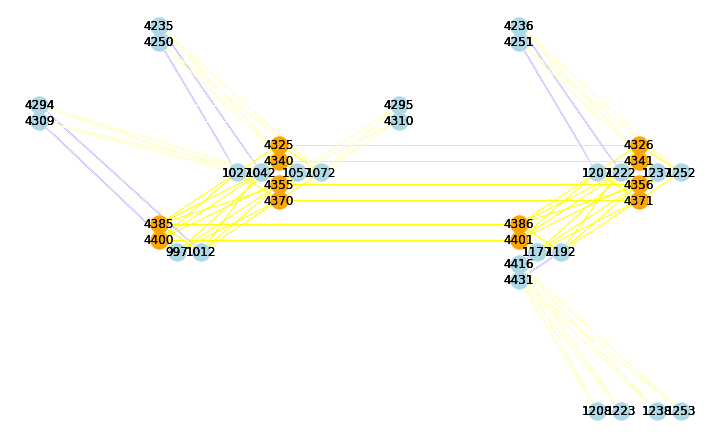

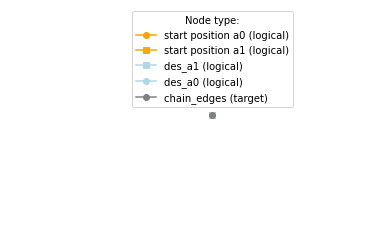

In [277]:
# DRAW problem with chains, edges, nodes, and  edges and nodes not exisiting in the QPU/ structured_sampler
plt.ion()
fig, ax = plt.subplots()
ax. set_frame_on(False)
ax. tick_params(axis='both',labelcolor='w')
ax. tick_params(axis='both',which='both',color='white')
fig.set_figwidth(10.0)
fig.set_figheight(6.0)
if topology == 'c':
    dnx.draw_chimera(dnx.chimera_graph(16,16,edge_list=edge_target_list),               with_labels=True,  edge_color="Yellow", node_color='y')
    dnx.draw_chimera(dnx.chimera_graph(16,16,edge_list=chain_edges) ,                   with_labels=True,  edge_color="grey")#, node_color='grey')
    dnx.draw_chimera(dnx.chimera_graph(16,16,edge_list=chain_hole_list + edge_hole_list), with_labels=True,edge_color="r")
    dnx.draw_chimera(dnx.chimera_graph(16,16,node_list=Feature_options['A0_Des']) ,     with_labels=True,  node_color="y")#, node_color='grey')        
    dnx.draw_chimera(dnx.chimera_graph(16,16,node_list=node_target_missing) ,           with_labels=True,  node_color="r")

else:
    dnx.draw_pegasus(dnx.pegasus_graph(16,edge_list=edge_target_list),              with_labels=True, crosses=True ,  edge_color="Yellow", node_color='w')
    
    dnx.draw_pegasus(dnx.pegasus_graph(16,edge_list=chain_edges) ,                   with_labels=True, crosses=True ,  edge_color="b", node_color='w')
    dnx.draw_pegasus(dnx.pegasus_graph(16,edge_list=chain_hole_list + edge_hole_list), with_labels=True, crosses=True ,  edge_color="r")
   
    for idx in range(len(Feature_options)):
        dnx.draw_pegasus(dnx.pegasus_graph(16,node_list=Feature_options[Feature_encode[idx]]),edgelist=None , with_labels=True, crosses=True ,node_color=Feature_color[idx],edge_color='w')
    
    dnx.draw_pegasus(dnx.pegasus_graph(16,node_list=node_target_missing) ,          with_labels=True, crosses=True ,  node_color="r",edge_color='w')
    
##################### draw legend ####################
if 1:
    fig1, ax1 = plt.subplots()
    ax1. set_frame_on(False)
    ax1. tick_params(axis='both',labelcolor='w')
    ax1. tick_params(axis='both',which='both',color='white')
    start_a0 =plt.plot(0, 0, color='orange',  marker='o', label='start position a0 (logical)') 
    line1 =plt.plot( color='orange', marker='s', label='start position a1 (logical)') 
    start_a1 =plt.plot(0, 0, color='orange',  marker='s', label='start position a1 (logical)') 
    des_a1 = plt.plot(0, 0, color='lightblue',  marker='s', label='des_a1 (logical)') 
    des_a0 = plt.plot(0, 0, color='lightblue',  marker='o', label='des_a0 (logical)') 
    chain_edges_legend = plt.plot(0, 0, color='grey',  marker='o', label='chain_edges (target)') 
    plt.legend(title='Node type:',loc='upper center') 


In [ ]:
# Supply the ACTUAL EMBEDDING and show it can be run on the QPU, 
from tabu import TabuSampler                                               
import dimod
import dwave.inspector

from dwave.system import FixedEmbeddingComposite, LazyFixedEmbeddingComposite,EmbeddingComposite
from dwave.system.samplers import DWaveSampler

#eg embedding = {12: [722], 13: [722+15*1], 14: [722+15*2],15:[722+15*3]}   #first 4 start positions
from dwave.system.samplers import DWaveSampler
structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})#, chains=[2,3])                      

sampler = FixedEmbeddingComposite(structured_sampler, embedding)
Myqubo = dimod.BinaryQuadraticModel.from_qubo(Adjacency)
Num_readsMy=1
response = sampler.sample(Myqubo, return_embedding=True,num_reads=Num_readsMy)#,chain_strength=5)#,,anneal_schedule=anneal_scheduleMy,

print('OUTPUT:\n',response)
#print(response.info['embedding_context']['embedding'])
#dwave.inspector.show( response)